## **1. KSZTAŁT I OGÓLNE INFORMACJE** 

#### **CEL EDA**

- **zrozumienie struktury danych (orders + order_items + products)**

- **analiza braków danych i ich przyczyn**

- **rozkład cen, kosztów dostawy i kategorii**

- **zależności cena–freight oraz cechy produktu–freight**

- **identyfikacja wartości odstających**

In [4]:
import pandas as pd
pd.options.display.max_columns = None
order_items_df = pd.read_csv('olist_order_items_dataset.csv', sep = ',')
orders_df = pd.read_csv('olist_orders_dataset.csv', sep = ',')
products_df = pd.read_csv('olist_products_dataset.csv', sep =',')

order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# połączymy tabele aby łatwiej robić analizy
df = orders_df.merge(order_items_df, on = 'order_id', how= 'left')
df = df.merge(products_df, on = 'product_id', how='left')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [9]:
df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
dtype: int64

In [10]:
print(df.shape[1])
print(df.shape[0])

22
113425


##### WSTĘPNE WNIOSKI

- 113 425 wierszy
- 22 kolumny 


##### KOLUMNY(opis): 
- **order_id** - Identyfikator zamówienia         
- **customer_id** - Identyfikator klienta                     
- **order_status** - Status zamówienia                         
- **order_purchase_timestamp** - Moment zakupu         
- **order_approved_at** - Moment zatwierdzenia zamówienia                
- **order_delivered_carrier_date** - Moment przekazania paczki firmie kurierskiej     
- **order_delivered_customer_date** - Moment dostarczenia paczki dla klienta         
- **order_estimated_delivery_date** - Szacowana data dostarczenia    
- **order_item_id** - Numer id w danym zamówieniu                       
- **product_id** - Identyfikator produktu                       
- **seller_id** - Identyfikator sprzedającego                         
- **shipping_limit_date** - Deadline dla sprzedawcy           
- **price** - Cena produktu                             
- **freight_value** - Koszt transportu przesyłki                    
- **product_category_name** - Nazwa kategorii produktu               
- **product_name_lenght** - Długość nazwy produktu                 
- **product_description_lenght** - Długość opisu produktu        
- **product_photos_qty** - Ilość zdjęć produktu                  
- **product_weight_g** - Waga produktu w gramach                  
- **product_length_cm** - Długość produktu w cm                   
- **product_height_cm** - Wysokość produktu w cm                  
- **product_width_cm** - Szerokość produktu w cm                    

## **2. ANALIZA BRAKUJĄCYCH WARTOŚCI**

In [11]:
df.isnull().sum()
# sprawdzam ile danych brakuje w poszczególnych kolumnach

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
dtype: int64

In [55]:
missing_df = df.isnull().sum()
missing_pct = (missing_df / len(df) * 100).round(2)

# liczę udział procentowy brakujących wierszy 

missing_table = pd.DataFrame({
    'missing_count': missing_df,
    'missing_pct': missing_pct
}).sort_values('missing_count', ascending= False)

missing_table[missing_table['missing_count']> 0]

# biorę tabele gdzie zliczone są brakujące dane i przedstawiony jest udział tych braków w całości 

,missing_count,missing_pct
order_delivered_customer_date,3229,2.85
product_photos_qty,2378,2.10
product_name_lenght,2378,2.10
product_category_name,2378,2.10
product_description_lenght,2378,2.10
order_delivered_carrier_date,1968,1.74
product_weight_g,793,0.70
product_length_cm,793,0.70
product_width_cm,793,0.70
product_height_cm,793,0.70


In [12]:
product_id_null_df = df[df['product_id'].isnull()]
product_id_null_df.head()
# sprawdzam zamówienia gdzie brak product_id

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
product_id_null_df.groupby('order_status')['order_id'].count()

# większość brakujących danych jest z zamówień gdzie produkty były niedostępne lub zamówienie zostało anulowane
# co jest dość logiczne, jeśli jest niedostępny to nie ma danych odnośnie sprzedazy, id tego produktu itd

order_status
canceled       164
created          5
invoiced         2
shipped          1
unavailable    603
Name: order_id, dtype: int64

In [14]:
product_category_null_df = df[df['product_category_name'].isnull()]

product_category_null_df.groupby('order_status')['order_id'].count()

# sprawdzam zamówienia gdzie brakuje wartości w kategoriach

order_status
canceled        178
created           5
delivered      1537
invoiced         14
processing       13
shipped          28
unavailable     603
Name: order_id, dtype: int64

In [15]:
product_category_null_df['product_id'].value_counts()
# sprawdzam czy istnieje zależność w konkretnych produktach
# ale brak jednoznacznej zależności, że dany produkt odpowiada brakom w kategorii 

product_id
5a848e4ab52fd5445cdc07aab1c40e48    197
b1d207586fca400a2370d50a9ba1da98     48
76d1a1a9d21ab677a61c3ae34b1b352f     32
ad88641611c35ebd59ecda07a9f17099     29
3b60d513e90300a4e9833e5cda1f1d61     29
                                   ... 
44e8945e17aef03daaecbc4bbab7f730      1
a61e6f38c9e407c7d764ea09d34b0a76      1
21e4321fa558327afe025bfb800a8bff      1
61e9a389f1bef5181fc96e33f0dc16a6      1
5a2a2db3896d33beec6828b898812ad5      1
Name: count, Length: 610, dtype: int64

##### WSTĘPNE WNIOSKI 

###### BRAKUJĄCE DANE
- order_approved_at        -      161
- order_delivered_carrier_date    - 1968
- order_delivered_customer_date -   3229
- order_item_id            -         775
- product_id               -         775
- seller_id                -         775
- shipping_limit_date      -         775
- price                     -        775
- freight_value              -       775
- product_category_name      -      2378
- product_name_lenght        -      2378
- product_description_lenght   -    2378
- product_photos_qty         -      2378
- product_weight_g            -      793
- product_length_cm           -      793
- product_height_cm           -      793
- product_width_cm            -      793



***Product_id* brakuje w zdecydowanej większości w produktach, które miały *status_order* unavailable**
**Liczba brakujących wartości w niektórych kolumnach jest taka sama ponieważ są one ze sobą powiązane**

# **3. ANALIZA POJEDYNCZYCH ZMIENNYCH**

In [16]:
df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
dtype: int64

In [17]:
df['order_purchase_timestamp'].agg(['min', 'max'])
# sprawdzam jakiego okresu dotyczą dane

min    2016-09-04 21:15:19
max    2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

In [18]:
df['price'].agg(['min', 'max', 'mean','median', 'std'])
# sprawdzam jak wygląda sytuacja z ceną produkty, spory rozrzut.

min          0.850000
max       6735.000000
mean       120.653739
median      74.990000
std        183.633928
Name: price, dtype: float64

In [19]:
bins = [0, 2, 10, 20, 50, 100, 500, 1500, 7000]
labels = ['0-2', '3-10', '11-20', '21-50', '51-100', '101-500', '501-1500', '1501 +']

df['price_group'] = pd.cut(df['price'], bins = bins, labels = labels, right = True)
df['price_group'].value_counts().sort_index() 
# tworzę przedziały cenowe aby zobaczyć rozkład ile sztuk sprzedaje się po jakich cenach

price_group
0-2            23
3-10         1246
11-20        8132
21-50       29916
51-100      33020
101-500     37097
501-1500     2882
1501 +        334
Name: count, dtype: int64

Text(0.5, 1.0, 'Podział ilości produktów względem ceny')

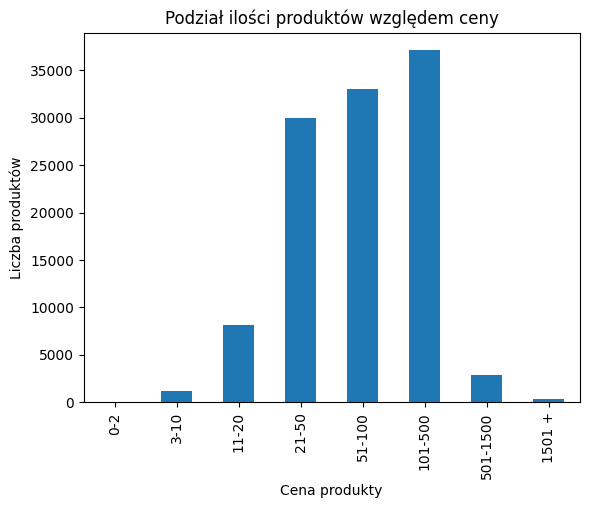

In [20]:
df['price_group'].value_counts().sort_index().plot(kind='bar')
ax = df['price_group'].value_counts().sort_index().plot(kind='bar')
ax.set_ylabel('Liczba produktów')
ax.set_xlabel('Cena produkty')
ax.set_title('Podział ilości produktów względem ceny')

# łatwo wynika, że zdecydowana większość mieści się w przedziale 21-500

In [21]:
df['freight_value'].agg(['min', 'max', 'mean','median', 'std'])

min         0.000000
max       409.680000
mean       19.990320
median     16.260000
std        15.806405
Name: freight_value, dtype: float64

In [22]:
df.groupby('product_category_name')['order_id'] \
    .count() \
    .sort_values(ascending=False) \
    .head(20)

# sprawdzam najpopularniejsze kategorie

product_category_name
cama_mesa_banho                11115
beleza_saude                    9670
esporte_lazer                   8641
moveis_decoracao                8334
informatica_acessorios          7827
utilidades_domesticas           6964
relogios_presentes              5991
telefonia                       4545
ferramentas_jardim              4347
automotivo                      4235
brinquedos                      4117
cool_stuff                      3796
perfumaria                      3419
bebes                           3065
eletronicos                     2767
papelaria                       2517
fashion_bolsas_e_acessorios     2031
pet_shop                        1947
moveis_escritorio               1691
consoles_games                  1137
Name: order_id, dtype: int64

In [23]:
df[
    [
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ]
].agg(['min', 'max', 'mean', 'median', 'std'])

# sprawdzam statystyki opisowe dla wymiarów produktów

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
min,0.000000,7.000000,2.000000,6.000000
max,40425.000000,105.000000,105.000000,118.000000
mean,2093.672047,30.153669,16.593766,22.996546
median,700.000000,25.000000,13.000000,20.000000
std,3751.596884,16.153449,13.443483,11.707268


In [58]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

df_delivered = df[df["order_status"] == "delivered"].copy()

df_delivered["delivery_days"] = (
    df_delivered["order_delivered_customer_date"] -
    df_delivered["order_purchase_timestamp"]
).dt.days

df_delivered["delivery_days"].agg(['min', 'max', 'mean', 'median'])
# sprawdzam czas dostawy aby zbadać proces logistyczny

min         0.000000
max       209.000000
mean       12.007342
median     10.000000
Name: delivery_days, dtype: float64

#### WSTĘPNE WNIOSKI

##### ZAKRES CZASOWY DANYCH
- 2016-09-04 - 2018-10-17
##### ILOŚĆ SPRZEDANYCH SZTUK W DANYM PRZEDZIALE CENOWYM:
- 0-2     -       23
- 3-10    -     1246
- 11-20   -     8132
- 21-50   -    29916
- 51-100   -   33020
- 101-500  -   37097
- 501-1500  -   2882
- 1501 +    -    334


##### NAJPOPULARNIEJSZE KATEGORIE:
- cama_mesa_banho       -         11115
- beleza_saude           -         9670
- esporte_lazer           -        8641
- moveis_decoracao         -       8334
- informatica_acessorios    -      7827
- utilidades_domesticas      -     6964
- relogios_presentes          -    5991
- telefonia                    -   4545
- ferramentas_jardim            -  4347




# **4. TRANSFORMACJA DANYCH**

In [24]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
price_group                       775
dtype: int64

##### WSTĘPNE WNIOSKI

- Na tym etapie brak analitycznego uzasadnienia aby brakujące dane poddać tranformacji 

# **5. BADANIE RELACJI MIĘDZY ZMIENNYMI**

In [25]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_group
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,21-50
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,101-500
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,101-500
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,21-50
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,101-500
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,101-500
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,101-500
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,101-500


In [26]:
df.corr(numeric_only= True)

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060522,-0.029380,-0.022662,-0.014311,-0.055852,-0.003549,0.005628,0.029323,-0.010732
price,-0.060522,1.000000,0.414204,0.017001,0.198166,0.051848,0.338819,0.145811,0.223602,0.172467
freight_value,-0.029380,0.414204,1.000000,0.023611,0.093855,0.022259,0.610420,0.309086,0.391831,0.323777
product_name_lenght,-0.022662,0.017001,0.023611,1.000000,0.091524,0.145904,0.022731,0.060447,-0.028170,0.064442
product_description_lenght,-0.014311,0.198166,0.093855,0.091524,1.000000,0.118087,0.059710,0.005971,0.072724,-0.068419
product_photos_qty,-0.055852,0.051848,0.022259,0.145904,0.118087,1.000000,0.022667,0.047503,-0.033399,0.010367
product_weight_g,-0.003549,0.338819,0.610420,0.022731,0.059710,0.022667,1.000000,0.460919,0.583277,0.506609
product_length_cm,0.005628,0.145811,0.309086,0.060447,0.005971,0.047503,0.460919,1.000000,0.192895,0.532537
product_height_cm,0.029323,0.223602,0.391831,-0.028170,0.072724,-0.033399,0.583277,0.192895,1.000000,0.281224
product_width_cm,-0.010732,0.172467,0.323777,0.064442,-0.068419,0.010367,0.506609,0.532537,0.281224,1.000000


In [27]:
df[['price', 'freight_value']].corr()
# droższe produkty mają droższą dostawę

,price,freight_value
price,1.000000,0.414204
freight_value,0.414204,1.000000


In [28]:
df[['price', 'product_weight_g']].corr()
# na cenę nieznacznie wpływa waga produktu

,price,product_weight_g
price,1.000000,0.338819
product_weight_g,0.338819,1.000000


In [29]:
df.groupby('price_group')['freight_value'].mean()

# koszty dostawy rosną wraz z ceną, największy skok jest w produktach 500+ 

C:\Users\PC\AppData\Local\Temp\ipykernel_6556\2219561265.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_group')['freight_value'].mean()


price_group
0-2          9.415652
3-10        12.959526
11-20       13.783014
21-50       15.111364
51-100      17.879832
101-500     25.018272
501-1500    44.967405
1501 +      69.758713
Name: freight_value, dtype: float64

In [30]:
df[[
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "freight_value"
]].corr()

# na koszt przesyłki największy wpływ ma waga

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,freight_value
product_weight_g,1.000000,0.460919,0.583277,0.506609,0.610420
product_length_cm,0.460919,1.000000,0.192895,0.532537,0.309086
product_height_cm,0.583277,0.192895,1.000000,0.281224,0.391831
product_width_cm,0.506609,0.532537,0.281224,1.000000,0.323777
freight_value,0.610420,0.309086,0.391831,0.323777,1.000000


In [31]:
df.groupby('price_group')['order_item_id'].count()

C:\Users\PC\AppData\Local\Temp\ipykernel_6556\4226818223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_group')['order_item_id'].count()


price_group
0-2            23
3-10         1246
11-20        8132
21-50       29916
51-100      33020
101-500     37097
501-1500     2882
1501 +        334
Name: order_item_id, dtype: int64

In [32]:
agg_df = (
    df.groupby("product_category_name")
      .agg(
          orders=("order_id", "nunique"),
          items=("order_item_id", "count"),
          avg_price=("price", "mean"),
          median_price=("price", "median"),
          total_revenue=("price", "sum"),
          avg_freight=("freight_value", "mean")
      )
      .sort_values("orders", ascending=False)
)
agg_df.head(20)

# pokazuje rozkład w podziale na daną kategorię produktów

,orders,items,avg_price,median_price,total_revenue,avg_freight
product_category_name,,,,,,
cama_mesa_banho,9417,11115,93.296327,79.05,1036988.68,18.415928
beleza_saude,8836,9670,130.163531,79.90,1258681.34,18.879703
esporte_lazer,7720,8641,114.344285,78.00,988048.97,19.512500
informatica_acessorios,6689,7827,116.513903,81.99,911954.32,18.821781
moveis_decoracao,6449,8334,87.564494,65.49,729762.49,20.728258
utilidades_domesticas,5884,6964,90.788148,59.80,632248.66,20.986374
relogios_presentes,5624,5991,201.135984,129.00,1205005.68,16.781160
telefonia,4199,4545,71.213978,29.99,323667.53,15.669041
automotivo,3897,4235,139.957523,84.90,592720.11,21.880569


In [33]:
df["has_category"] = df["product_category_name"].notna()

df.groupby("has_category").agg(
    avg_price=("price", "mean"),
    avg_freight=("freight_value", "mean")
)
# chciałem sprawdzić czy dane w których nie ma kategorii różnią się mocno jeśli chodzi o średnią cenę i cenę dostawy z danymi które mają kategorie
# brak istotnych zależności

,avg_price,avg_freight
has_category,,
False,111.999551,17.573182
True,120.778665,20.025212


# **6. WARTOŚCI ODSTAJĄCE** 

In [34]:
df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_group,has_category
40709,5e4a5632c531091bf04eb6e365e84d36,058b4cfa2da81472fbfe410a03f536c7,delivered,2018-02-22 19:24:45,2018-02-22 19:48:31,2018-02-23 22:57:02,2018-03-14 19:03:02,2018-03-20 00:00:00,1.0,e44f675b60b3a3a2453ec36421e06f0f,218d46b86c1881d022bce9c68a7d4b15,2018-02-28 19:48:31,107.00,15.50,esporte_lazer,35.0,1058.0,1.0,350.0,17.0,17.0,17.0,101-500,True
49274,0627a80d6b5c65e9b212271f845e34da,d94f717fa5e77c3d7b16ee7cccdfe45e,delivered,2017-10-30 22:57:51,2017-11-01 03:31:16,2017-11-14 16:32:31,2017-12-15 02:55:01,2017-12-08 00:00:00,1.0,32ad146ce66014dd98fdc2190bc995d6,b6dc74ed30f124f95227bed4e43a3bed,2017-11-14 03:30:34,33.80,42.38,esporte_lazer,36.0,491.0,1.0,200.0,18.0,9.0,13.0,21-50,True
47236,015f079801c424fda3edc48be99267de,e9887a9874d592a5904dc3b85187ec42,delivered,2017-04-06 21:55:36,2017-04-06 22:10:11,2017-04-07 13:47:55,2017-04-20 13:59:47,2017-05-12 00:00:00,1.0,78b7b1ff2d3f06a589354ddf2f4f9db3,620c87c171fb2a6dd6e8bb4dec959fc6,2017-04-12 22:10:11,292.90,26.54,perfumaria,31.0,355.0,1.0,448.0,22.0,17.0,17.0,101-500,True
106019,4ce424b0c7d519446e0a6b2bc0ff9fa1,7b663551ee814f12471e4a4efa3f0820,delivered,2018-03-23 20:51:47,2018-03-23 21:08:06,2018-03-29 21:22:08,2018-04-11 00:34:29,2018-04-17 00:00:00,1.0,3fbc0ef745950c7932d5f2a446189725,06a2c3af7b3aee5d69171b0e14f0ee87,2018-03-28 21:08:06,61.99,27.49,beleza_saude,50.0,1257.0,1.0,350.0,19.0,12.0,13.0,51-100,True
78557,162f8986e2cc7a5fca25fd4be685b98d,fcc709844375ea0a1a14bc3c14b2c1ee,delivered,2018-07-18 18:01:48,2018-07-19 14:22:57,2018-07-20 14:20:00,2018-08-01 15:08:52,2018-08-13 00:00:00,1.0,f32415d23c358ef1e387a7d329d9ce9f,3586b8580d9c917874e053a1bb37b5ff,2018-07-25 14:22:57,36.90,50.98,papelaria,59.0,276.0,2.0,550.0,66.0,12.0,12.0,21-50,True


<Axes: >

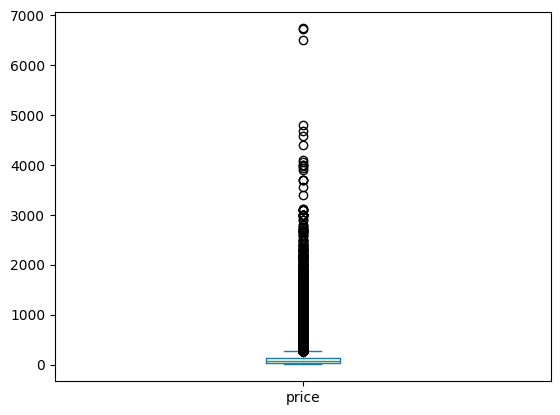

In [35]:
df['price'].plot(kind='box')

# wykres pokazujący wartości odstające w kolumnie z ceną 

In [44]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers_price = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))] 
outliers_price['price'].agg(['min', 'max', 'mean', 'median'])
# DataFrame z samymi outliersami jeśli chodzi o cenę 

min        277.450000
max       6735.000000
mean       574.291188
median     409.990000
Name: price, dtype: float64

<Axes: >

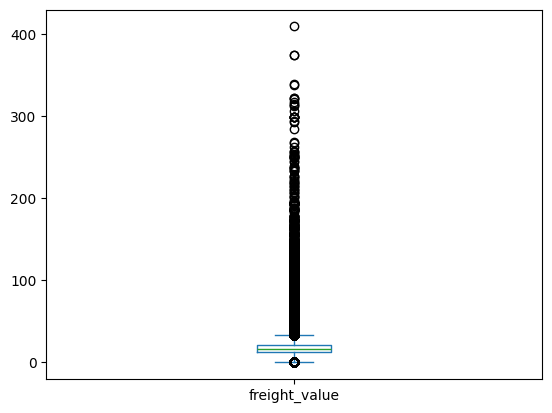

In [37]:
df['freight_value'].plot(kind='box')
# wartości odstające w cenie dostawy

In [48]:
Q1 = df['freight_value'].quantile(0.25)
Q3 = df['freight_value'].quantile(0.75)
IQR = Q3 - Q1

outliers_freight_value = df[(df['freight_value'] < (Q1 - 1.5 * IQR)) | (df['freight_value'] > (Q3 + 1.5 * IQR))] 
outliers_freight_value['freight_value'].agg(['min', 'max', 'mean', 'median'])
# DataFrame z wartościami odstającymi dla ceny dostawy

min         0.000000
max       409.680000
mean       52.004304
median     44.040000
Name: freight_value, dtype: float64

<Axes: >

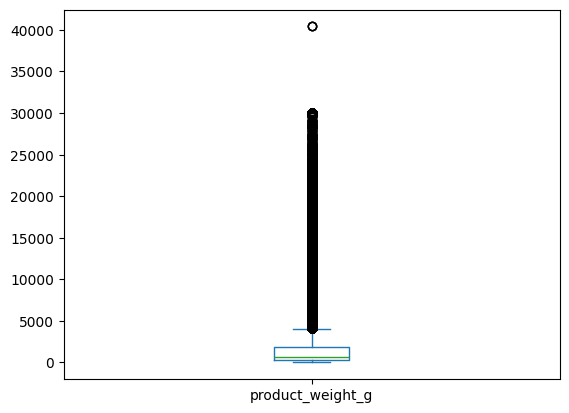

In [39]:
df['product_weight_g'].plot(kind='box')
# wartości odstające w wadze produktów


In [51]:
Q1 = df['product_weight_g'].quantile(0.25)
Q3 = df['product_weight_g'].quantile(0.75)
IQR = Q3-Q1

outliers_weight = df[(df['product_weight_g'] < (Q1 - 1.5 * IQR)) | (df['product_weight_g'] > (Q3 + 1.5 * IQR))]
outliers_weight['product_weight_g'].agg(['min', 'max', 'mean', 'median'])

# DataFrame z wartościami odstającymi w wadze produktu

min        4073.000000
max       40425.000000
mean       9691.685835
median     7900.000000
Name: product_weight_g, dtype: float64

# **RAPORT KOŃCOWY**

## 1. INFORMACJE PODSTAWOWE 
- **113 425 rekordów** 
- **22 kolumny** 
##### KOLUMNY WZIĘTE DO ANALIZY 
- **order_id** - Identyfikator zamówienia         
- **customer_id** - Identyfikator klienta                     
- **order_status** - Status zamówienia                         
- **order_purchase_timestamp** - Moment zakupu         
- **order_approved_at** - Moment zatwierdzenia zamówienia                
- **order_delivered_carrier_date** - Moment przekazania paczki firmie kurierskiej     
- **order_delivered_customer_date** - Moment dostarczenia paczki dla klienta         
- **order_estimated_delivery_date** - Szacowana data dostarczenia    
- **order_item_id** - Numer id w danym zamówieniu                       
- **product_id** - Identyfikator produktu                       
- **seller_id** - Identyfikator sprzedającego                         
- **shipping_limit_date** - Deadline dla sprzedawcy           
- **price** - Cena produktu                             
- **freight_value** - Koszt transportu przesyłki                    
- **product_category_name** - Nazwa kategorii produktu               
- **product_name_lenght** - Długość nazwy produktu                 
- **product_description_lenght** - Długość opisu produktu        
- **product_photos_qty** - Ilość zdjęć produktu                  
- **product_weight_g** - Waga produktu w gramach                  
- **product_length_cm** - Długość produktu w cm                   
- **product_height_cm** - Wysokość produktu w cm                  
- **product_width_cm** - Szerokość produktu w cm     



## 2. BRAKUJĄCE DANE ORAZ UDZIAŁ % W CAŁOŚCI
- 161 z daty złożenia zamówienia (0.14%)
- 1 968 z daty przejęcia przesyłki przez kuriera (1.74%)
- 3 229 z daty doręczenia przesyłki do klienta (2.85%)
- 775 z produktów (0.68%)
- 2 378 z kategorii produktów oraz powiązanych (2.10%)
- 793 z wielkości produktu (0.70%)
##### Brakujące dane produktowe 
- Z 775 wierszy gdzie brakło danych produktów to znakomita większość była niedostępna. 


## 3. ANALIZA POJEDYNCZYCH, WYBRANYCH ZMIENNYCH
##### DATA ZŁOŻENIA ZAMÓWIEŃ 
- Zakres danych jest od 2016-09-04 do 2018-10-17

#### CENA PRODUKTÓW
- Min: 0.85
- Max: 6 725
- Średnia: 120.65
- Mediana: 75
- Odchylenie standardowe: 183.63
###### Średnia > medianam wskazuje na skośność prawostronną co oznacza, że występują drogie outliery.

##### ILOŚC SPRZEDANYCH SZTUK W GRUPACH CENOWYCH
- 0-2:            23
- 3-10:         1 246
- 11-20:        8 132
- 21-50 :      29 916
- 51-100 :     33 020
- 101-500 :    37 097
- 501-1500 :    2 882
- 1501 +    :    334

##### CENA DOSTAWY
- Min: 0
- Max: 409.68
- Mean: 19.99
- Median: 16.26
- Odchylenie standardowe: 15.8

#### KATEGORIE, A ILOŚĆ SPRZEDANYCH SZTUK (TOP10)
- cama_mesa_banho    -            11 115
- beleza_saude        -            9 670
- esporte_lazer        -           8 641
- moveis_decoracao      -          8 334
- informatica_acessorios -         7 827
- utilidades_domesticas   -        6 964
- relogios_presentes       -       5 991
- telefonia                 -      4 545
- ferramentas_jardim         -     4 347
-automotivo                   -   4 235

##### CZAS DOSTAWY 
- Min - 0 dni (zakup i dostawa tego samego dnia)
- Max - 209 dni (outlier)
- Mean - 12 dni 
- Median - 10 dni 


## 4. PRZYGOTOWANIE DANYCH DO ANALIZY
- Utworzenie price_group
- Stworzenie flag has_category
- Przygotowanie korelacji numerycznych
- Utworzenie dataframe z czasem dostawy



## 5. RELACJE MIĘDZY ZMIENNYMI 
##### Korelacja nr 1
- Cena i koszt dostawy mają umiarkowaną dodatnią korelację. (r = 0.41)

##### Korelacja nr 2
- Cena i waga produktu mają umiarkowaną dodatnią korelację. (r = 0.34)

##### Korelacja nr 3
- Najsilniej z kosztem dostawy koreluje waga produktu. (r = 0.61)



## 6. WARTOŚCI ODSTAJĄCE 

##### CENA
- Liczba rekordów odstających - 8 427 rekordów (7.43%)
- Min cena - 277.45
- Max cena - 6 735
- Średnia - 574.29
- Mediana - 409.99

###### (top3)
- 6 735
- 6 729
- 6 499

##### CENA DOSTAWY 
- Liczba rekordów odstających - 12 134 rekordów (10.70%)
- Min cena dostawy - 0
- Max cena dostawy - 409.68
- Średnia cena dostawy - 52
- Mediana ceny dostawy - 44.04

###### (top3)
- 409.68
- 375.28 
- 375.28

##### WAGA PRODUKTU w gramach 
- Liczba rekordów odstających - 15 807 (13.94%)
- Min waga - 4 073
- Max waga - 40 425
- Średnia - 9 691
- Mediana - 7 900

###### (top3)
- 40 425
- 40 425
- 30 000